# What is the average yearly growth rate of the MCSI World since 1970
# (without inflation)? (MSCI = World Wide Index of stocks)
# Answer is approx 7%

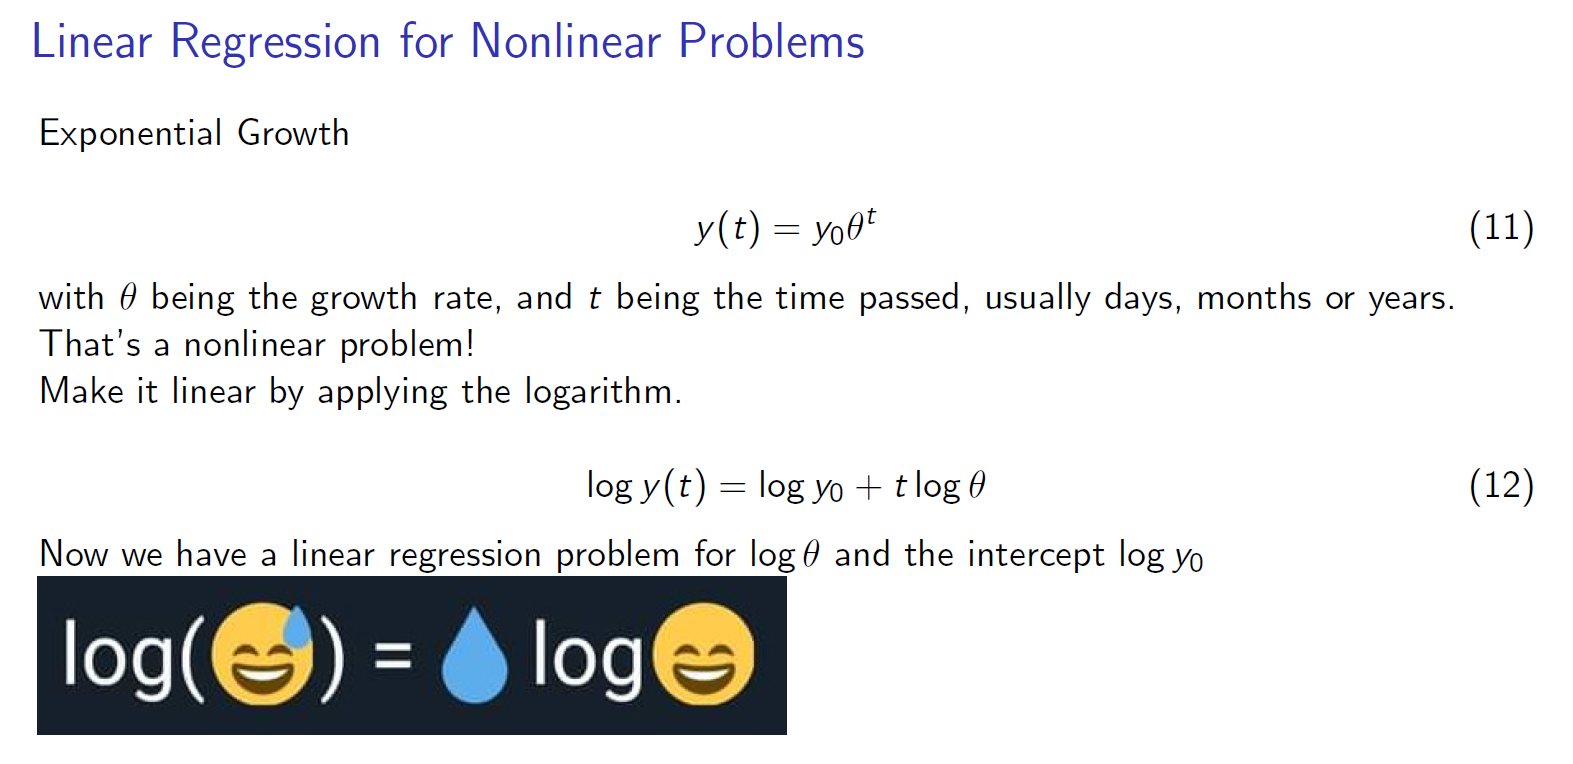

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics, model_selection

In [21]:
msci_world_monthly = pd.read_csv("../data/msci_world_monthly.csv")

In [22]:
msci_world_monthly

,date,value
0,1969-12-31,100.000
1,1970-01-30,94.249
2,1970-02-27,96.979
3,1970-03-31,97.075
4,1970-04-30,87.800
...,...,...
616,2021-04-30,2938.764
617,2021-05-31,2975.701
618,2021-06-30,3017.222
619,2021-07-30,3069.249


<AxesSubplot:xlabel='date', ylabel='value'>

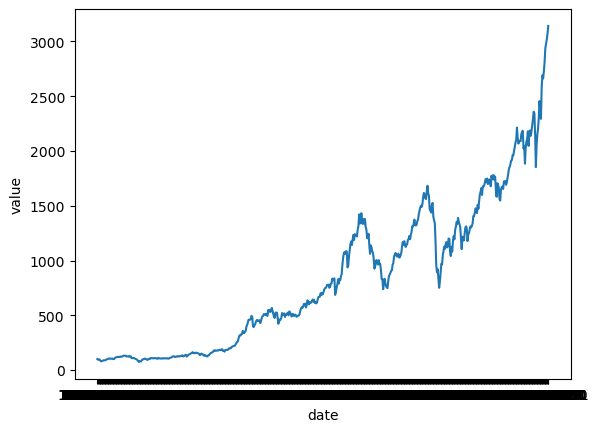

In [23]:
sns.lineplot(data=msci_world_monthly, x=msci_world_monthly.date, y=msci_world_monthly.value)

In [24]:
months_passed = np.array(msci_world_monthly.index)

In [25]:
months_passed

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
X = months_passed.reshape(-1, 1)  # -1 means dont change that dimension

In [27]:
X.shape

(621, 1)

In [28]:
y = msci_world_monthly["value"]
y

0       100.000
1        94.249
2        96.979
3        97.075
4        87.800
         ...   
616    2938.764
617    2975.701
618    3017.222
619    3069.249
620    3141.351
Name: value, Length: 621, dtype: float64

In [29]:
y_log = np.log(y)
y_log

0      4.605170
1      4.545940
2      4.574494
3      4.575484
4      4.475062
         ...   
616    7.985744
617    7.998235
618    8.012092
619    8.029188
620    8.052408
Name: value, Length: 621, dtype: float64

In [30]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X=X, y=y_log)

LinearRegression()

In [31]:
linear_regressor.coef_

array([0.0057529])

In [32]:
log_monthly_growth_rate = linear_regressor.coef_[0]
log_monthly_growth_rate

0.005752896301395474

In [33]:
monthly_growth_rate = np.exp(log_monthly_growth_rate)
monthly_growth_rate

1.0057694759878137

In [34]:
yearly_growth_rate = monthly_growth_rate**12
yearly_growth_rate

1.0714734482217296

In [35]:
percentage_growth_yearly = (yearly_growth_rate - 1.0) * 100.0
print(f"Yearly growth in percent: {percentage_growth_yearly:1.4f} %")

Yearly growth in percent: 7.1473 %


In [36]:
y_pred_log = linear_regressor.predict(X)
y_pred = np.exp(y_pred_log)

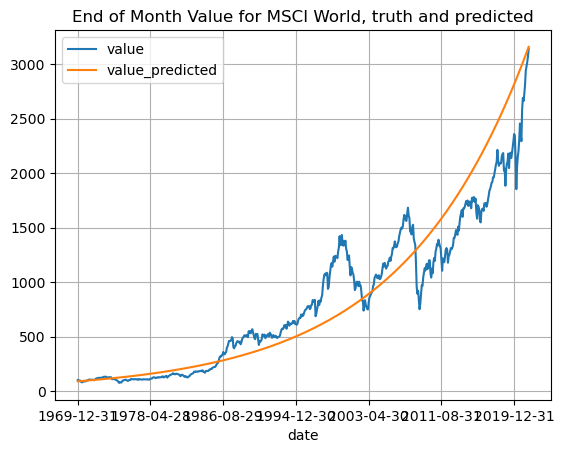

In [37]:
msci_world_monthly["value_predicted"] = y_pred
msci_world_monthly.plot.line(x="date", y=["value", "value_predicted"])
plt.title("End of Month Value for MSCI World, truth and predicted")
plt.grid()
plt.show()

In [42]:
import matplotlib as mat
mat.__version__

'3.5.2'